In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import os
import globals as gl
from force import load_mov
from matplotlib import colormaps as cm
from util import lowpass_butter, lowpass_fir
from matplotlib.lines import Line2D
from vis import plot_behav, plot_rep

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')

Base directory found: /cifs/diedrichsen/data/Chord_exp
Atlas directory found: /cifs/diedrichsen/data/Atlas_templates/fs_LR_32


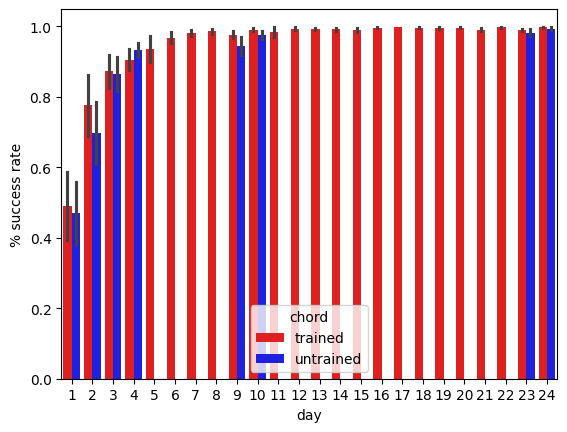

In [4]:
experiment = 'EFC_learningfMRI'
path = os.path.join(gl.baseDir, experiment, 'behavioural', 'single_trial_behaviour.tsv')
dat = pd.read_csv(path, sep='\t')

dat_tmp = dat.groupby(['subNum', 'session', 'day', 'chord']).mean(numeric_only=True).reset_index()
sb.barplot(x='day', y='trialPoint', hue='chord', data=dat_tmp, errorbar='se', palette=['red', 'blue'],hue_order=['trained', 'untrained'])

plt.ylabel('% success rate')
plt.show()

trained vs. untrained, day1: tval=1.144, pval=0.296
trained vs. untrained, day2: tval=-0.471, pval=0.655
trained vs. untrained, day3: tval=-0.800, pval=0.454
trained vs. untrained, day4: tval=0.064, pval=0.951
trained vs. untrained, day9: tval=-3.959, pval=0.007
trained vs. untrained, day10: tval=-3.398, pval=0.015
trained vs. untrained, day23: tval=-2.714, pval=0.035
trained vs. untrained, day24: tval=-1.823, pval=0.118


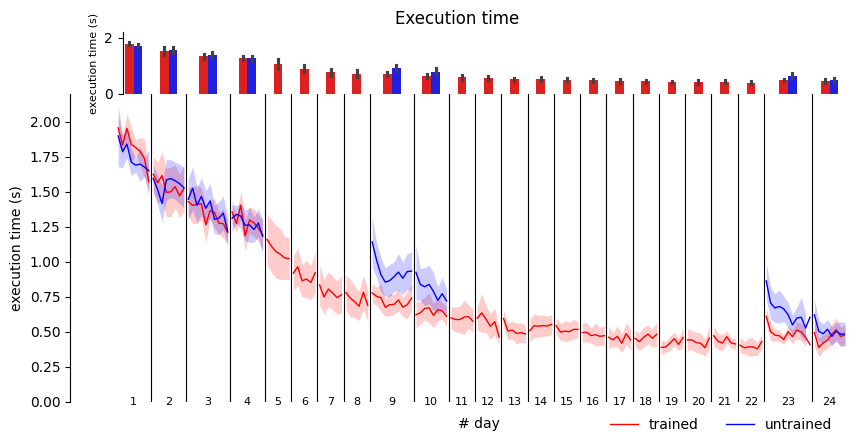

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))
dat_s = dat[dat.trialPoint==1]
plot_behav(fig, ax, dat_s, metric='ET', ylim=[0, 2.2], ylabel='execution time (s)', title='Execution time')
plt.show()

trained vs. untrained, day1: tval=0.681, pval=0.522
trained vs. untrained, day2: tval=-1.068, pval=0.327
trained vs. untrained, day3: tval=-0.750, pval=0.482
trained vs. untrained, day4: tval=-0.182, pval=0.863
trained vs. untrained, day9: tval=-3.434, pval=0.014
trained vs. untrained, day10: tval=-3.126, pval=0.020
trained vs. untrained, day23: tval=-2.965, pval=0.025
trained vs. untrained, day24: tval=-3.764, pval=0.009


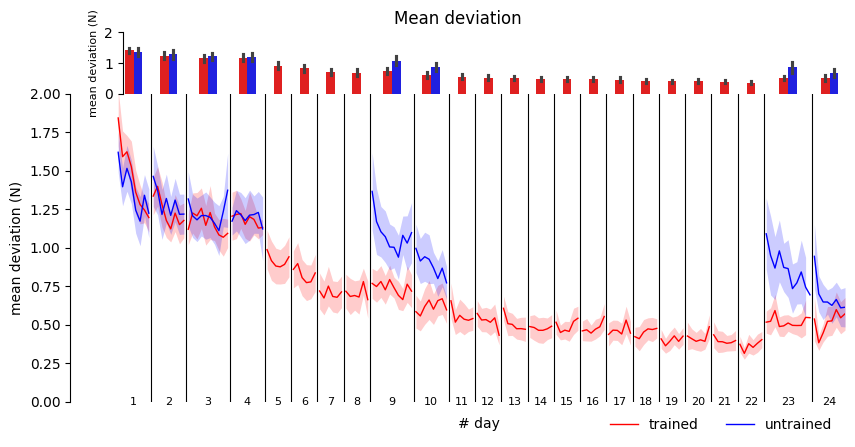

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_behav(fig, ax, dat_s, metric='MD', ylim=[0, 2], ylabel='mean deviation (N)', title='Mean deviation',)
plt.show()

trained vs. untrained, day1: tval=1.038, pval=0.339
trained vs. untrained, day2: tval=1.920, pval=0.103
trained vs. untrained, day3: tval=0.042, pval=0.968
trained vs. untrained, day4: tval=1.041, pval=0.345
trained vs. untrained, day9: tval=2.433, pval=0.051
trained vs. untrained, day10: tval=1.806, pval=0.121
trained vs. untrained, day23: tval=0.828, pval=0.440
trained vs. untrained, day24: tval=4.836, pval=0.003


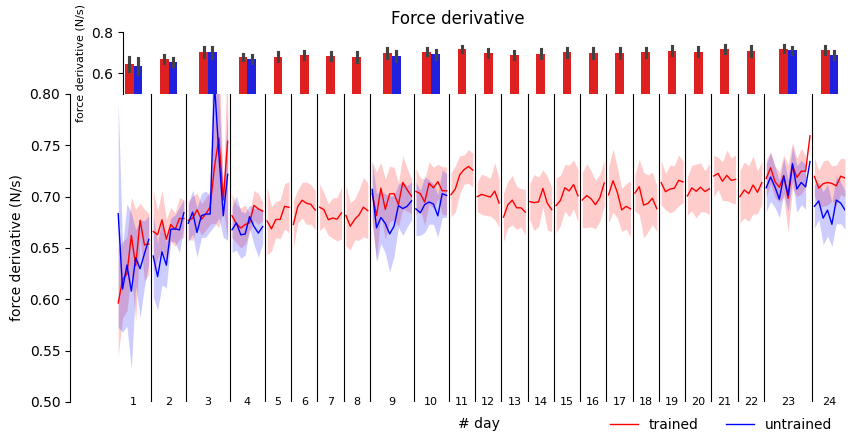

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_behav(fig, ax, dat_s, metric='force_der', ylim=[.5, .8], melt=True, id_vars=['subNum', 'chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_der', 'index_der', 'middle_der', 'ring_der', 'pinkie_der'], var_name='finger', ylabel='force derivative (N/s)', title='Force derivative', )
plt.show()

trained vs. untrained, day1: tval=-0.140, pval=0.893
trained vs. untrained, day2: tval=0.288, pval=0.783
trained vs. untrained, day3: tval=2.013, pval=0.091
trained vs. untrained, day4: tval=0.736, pval=0.495
trained vs. untrained, day9: tval=2.985, pval=0.024
trained vs. untrained, day10: tval=3.553, pval=0.012
trained vs. untrained, day23: tval=1.441, pval=0.200
trained vs. untrained, day24: tval=6.882, pval=0.000


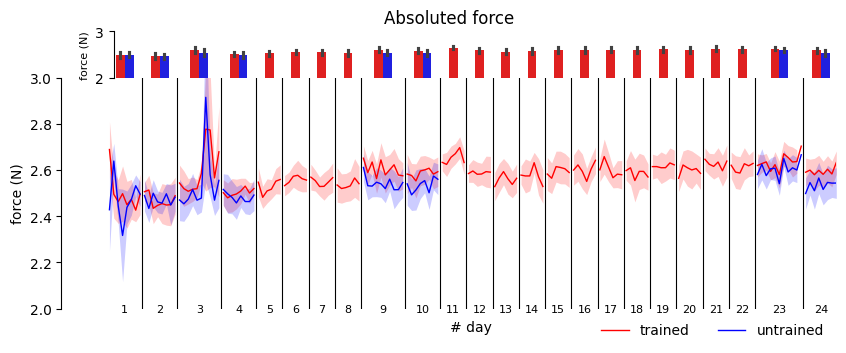

In [8]:
fig, ax = plt.subplots(figsize=(10, 3))
plot_behav(fig, ax, dat_s, metric='force', ylim=[2, 3], melt=True, id_vars=['subNum', 'chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_abs', 'index_abs', 'middle_abs', 'ring_abs', 'pinkie_abs'], var_name='finger', ylabel='force (N)', title='Absoluted force', )
plt.show()

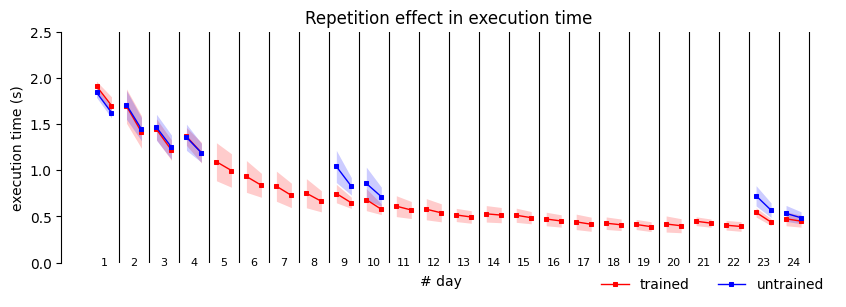

In [9]:
fig, ax = plt.subplots(figsize=(10, 3))
plot_rep(fig, ax, dat_s, metric='ET', ylim=[0, 2.5], ylabel='execution time (s)', title='Repetition effect in execution time')
plt.show()

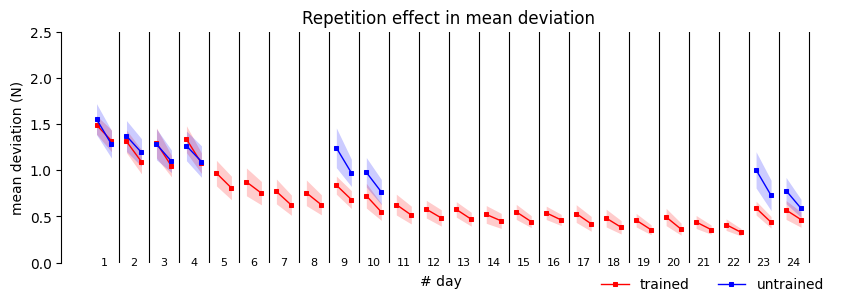

In [10]:
fig, ax = plt.subplots(figsize=(10, 3))
plot_rep(fig, ax, dat_s, metric='MD', ylim=[0, 2.5], ylabel='mean deviation (N)', title='Repetition effect in mean deviation')
plt.show()